In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display


In [6]:
bin_centers = np.load('/home/odokumaci/git_repo/correction-repo/dnn_bincenters.npy')
dnn_corriqr = np.load('/home/odokumaci/git_repo/correction-repo/dnn_corriqr.npy')
dnn_baseiqr = np.load('/home/odokumaci/git_repo/correction-repo/dnn_baseiqr.npy')
dnn_corrtogen = np.load('/home/odokumaci/git_repo/correction-repo/dnn_corrtogen.npy')
random_corriqr = np.load('/home/odokumaci/git_repo/correction-repo/randomf_corriqr.npy')
random_baseiqr = np.load('/home/odokumaci/git_repo/correction-repo/randomf_baseiqr.npy')
random_corrtogen = np.load('/home/odokumaci/git_repo/correction-repo/randomf_corrtogen.npy')
xg_corriqr = np.load('/home/odokumaci/git_repo/correction-repo/xg_corriqr.npy')
xg_baseiqr = np.load('/home/odokumaci/git_repo/correction-repo/xg_baseiqr.npy')
xg_corrtogen = np.load('/home/odokumaci/git_repo/correction-repo/xg_corrtogen.npy')


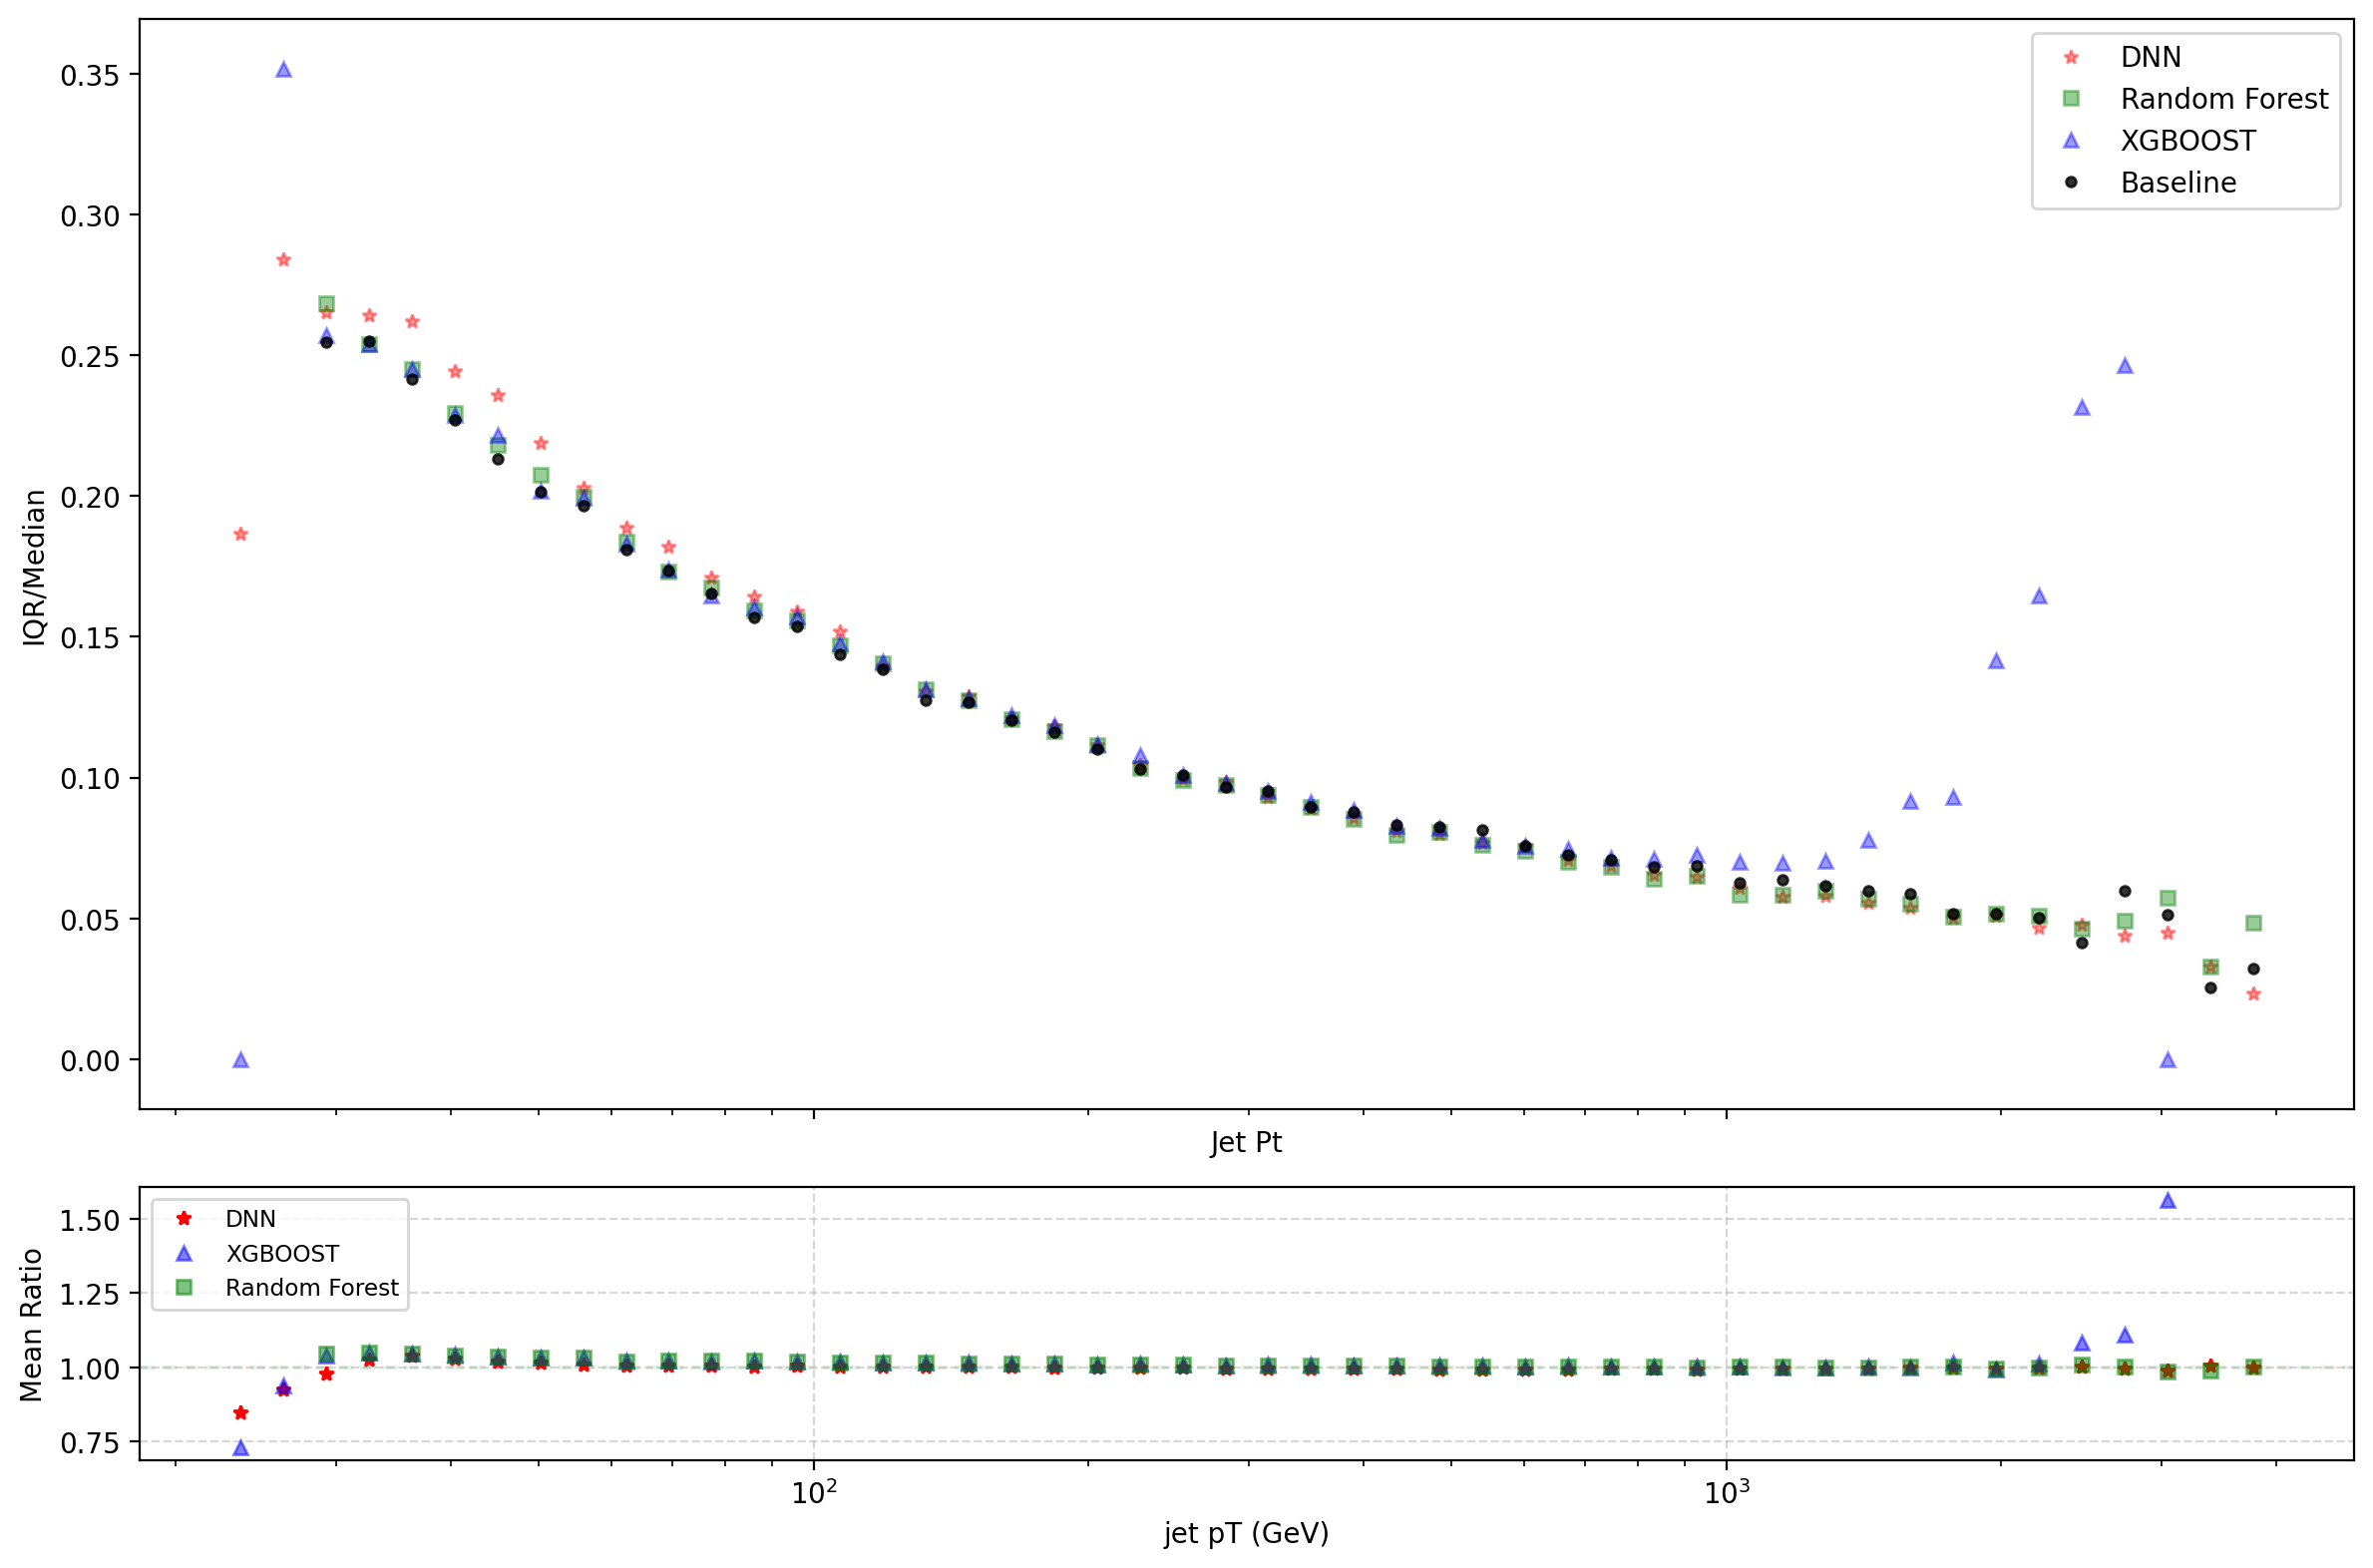

In [7]:
# Plotting the histogram and ratio plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [4, 1]}, figsize=(12, 8))


#common_bin_edges = np.linspace(min(X_test_original_scale[:, 0].min(), y_pred.min(), y_test.min()), max(X_test_original_scale[:, 0].max(), y_pred.max(), y_test.max()), 100)




ax1.errorbar(bin_centers, dnn_corriqr, fmt='*', markersize=5.0, alpha=0.4, color='red', label='DNN')
ax1.errorbar(bin_centers, random_corriqr, fmt='s', markersize=5.0, alpha=0.4, color='green', label='Random Forest')
ax1.errorbar(bin_centers, xg_corriqr, fmt='^', markersize=5.0, alpha=0.4, color='blue', label='XGBOOST')
ax1.errorbar(bin_centers, dnn_baseiqr, fmt='.', markersize=7.0, alpha=0.8, color='black', label='Baseline')


ax1.set_xlabel('Jet Pt')
ax1.set_ylabel('IQR/Median')
ax1.set_title('')
#ax1.set_yscale('log')
ax1.legend()

ax2.errorbar(bin_centers, dnn_corrtogen, fmt='*', markersize=5.0, alpha=1.0, color='red', label='DNN')
ax2.errorbar(bin_centers, xg_corrtogen, fmt='^', markersize=5.0, alpha=0.5, color='blue', label='XGBOOST')
ax2.errorbar(bin_centers, random_corrtogen, fmt='s', markersize=5.0, alpha=0.5, color='green', label='Random Forest')
ax2.axhline(y=1.0, alpha=0.1, color='g', linestyle='--')

ax2.set_xlabel('jet pT (GeV)')
ax2.set_ylabel('Mean Ratio')
ax2.set_title('')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(fontsize='small')
ax2.set_xscale('log')

#ax1.set_xlim(0, 2500)
#ax2.set_xlim(0, 2500)

plt.tight_layout()
plt.show()